1: Перше завдання: 
             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —
2: Друге завдання: 
Shape датафрейму: (28, 9)
3: Третє завдання: 
               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6  

C:\Users\katya\AppData\Local\Temp\ipykernel_15756\3560664389.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births_2014_clean['2014'] = pd.to_numeric(births_2014_clean['2014'])


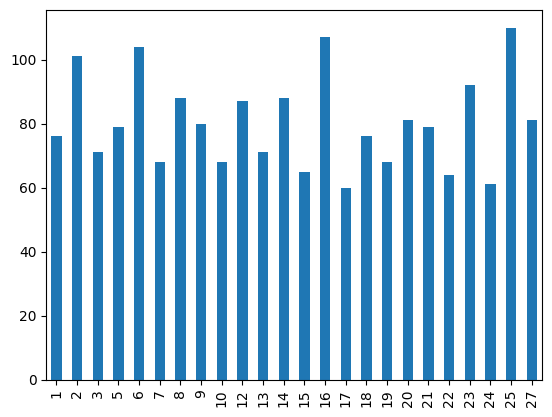

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, attrs={"class": "wikitable collapsible collapsed"})

df = tables[3]

#1
print(f'1: Перше завдання: \n{df.head()}')

#2
print(f'2: Друге завдання: \nShape датафрейму: {df.shape}')

#3
df_3task = df.replace("—", float('nan'))
print(f'3: Третє завдання: \n{df_3task}')

#4
print(f'4: Четверте завдання: \n{df.dtypes}')

#5
non_numeric_cols = df.columns[~df.map(lambda x: isinstance(x, (int, float))).all()]
df_5task = df.copy()
df_5task[non_numeric_cols] = df_5task[non_numeric_cols].apply(pd.to_numeric, errors='coerce')
print(f"5: П'яте завдання: \n{df_5task}")

#6
df_6task = df.isnull().sum() / len(df) * 100
print(f'6: Частка пропусків у кожному стовпці: \n{df_6task}')

#7
df_7task = df.drop(27)
print(f'7: Таблиця без рядка "Україна": \n{df_7task}')

#8
df_numeric = df_3task.apply(pd.to_numeric, errors='coerce')
df_filled = df_numeric.fillna(df_numeric.mean())

df_surgeon1 = df_filled.drop(df.columns[0], axis=1)
df_surgeon2 = df[df.columns[0]]
df_surgeon1.insert(0, 'Регіон', df_surgeon2)
print(f'8: Замінити пусті значення на середнє значення: \n{df_surgeon1}')

#операції з 2019 роком
average_value = df_numeric.iloc[-1, -1]

regions_above_average = df[df_numeric.iloc[:, -1] > average_value]

print(f'9: Регіони де рівень народжуваності за 2019 рік був більше середнього по країні: \n {regions_above_average}')

#операції з 2014 роком
births_2014 = df_3task[['Регіон', '2014']]

births_2014_clean = births_2014.dropna()
births_2014_clean['2014'] = pd.to_numeric(births_2014_clean['2014'])

fastest_birth_rate_2014 = births_2014_clean[births_2014_clean['2014'] == births_2014_clean['2014'].max()]

print(f'10: Регіон, де в 2014 році була найбільша народжуваність: \n{fastest_birth_rate_2014}')

#11
date_2 = df_3task[['2019']]
date_20 = date_2.dropna()
date2019 = pd.to_numeric(date_20['2019'])
date2019.plot.bar()
print(f'11: Стовпчикова діаграма: ')

